In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm

### Looking at data and columns to get the idea of data

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### 730 rows with no null columns, so no need to fill nulls

In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### drop instant column since its just a index which we anyways get in pandas

In [5]:
bikes = bikes.drop('instant', axis = 1)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

### continuous vars  = temp, atemp, hum, windspeed,yr,cnt
### categorical vars = saeson, holiday, workingday, weathersit, mnth,weekday
### should dteday be analyzed for its significance

#### Fetching month str from dteday and dropping numeric mnth

In [7]:
from datetime import datetime as dt
def get_mnth_str_fm_dt(dte:str):
    date = dt.strptime(dte, '%d-%m-%Y')
    return date.strftime('%b')
    
bikes['mnthstr'] = bikes['dteday'].apply(lambda x: get_mnth_str_fm_dt(x))
bikes = bikes.drop('mnth', axis=1)
bikes

,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnthstr
0,01-01-2018,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan
1,02-01-2018,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan
2,03-01-2018,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan
3,04-01-2018,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan
4,05-01-2018,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,Dec
726,28-12-2019,1,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,Dec
727,29-12-2019,1,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,Dec
728,30-12-2019,1,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,Dec


In [8]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt','yr']
cat_vars = ['season','holiday','workingday','weathersit', 'mnthstr','weekday']

C:\Users\Anshul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


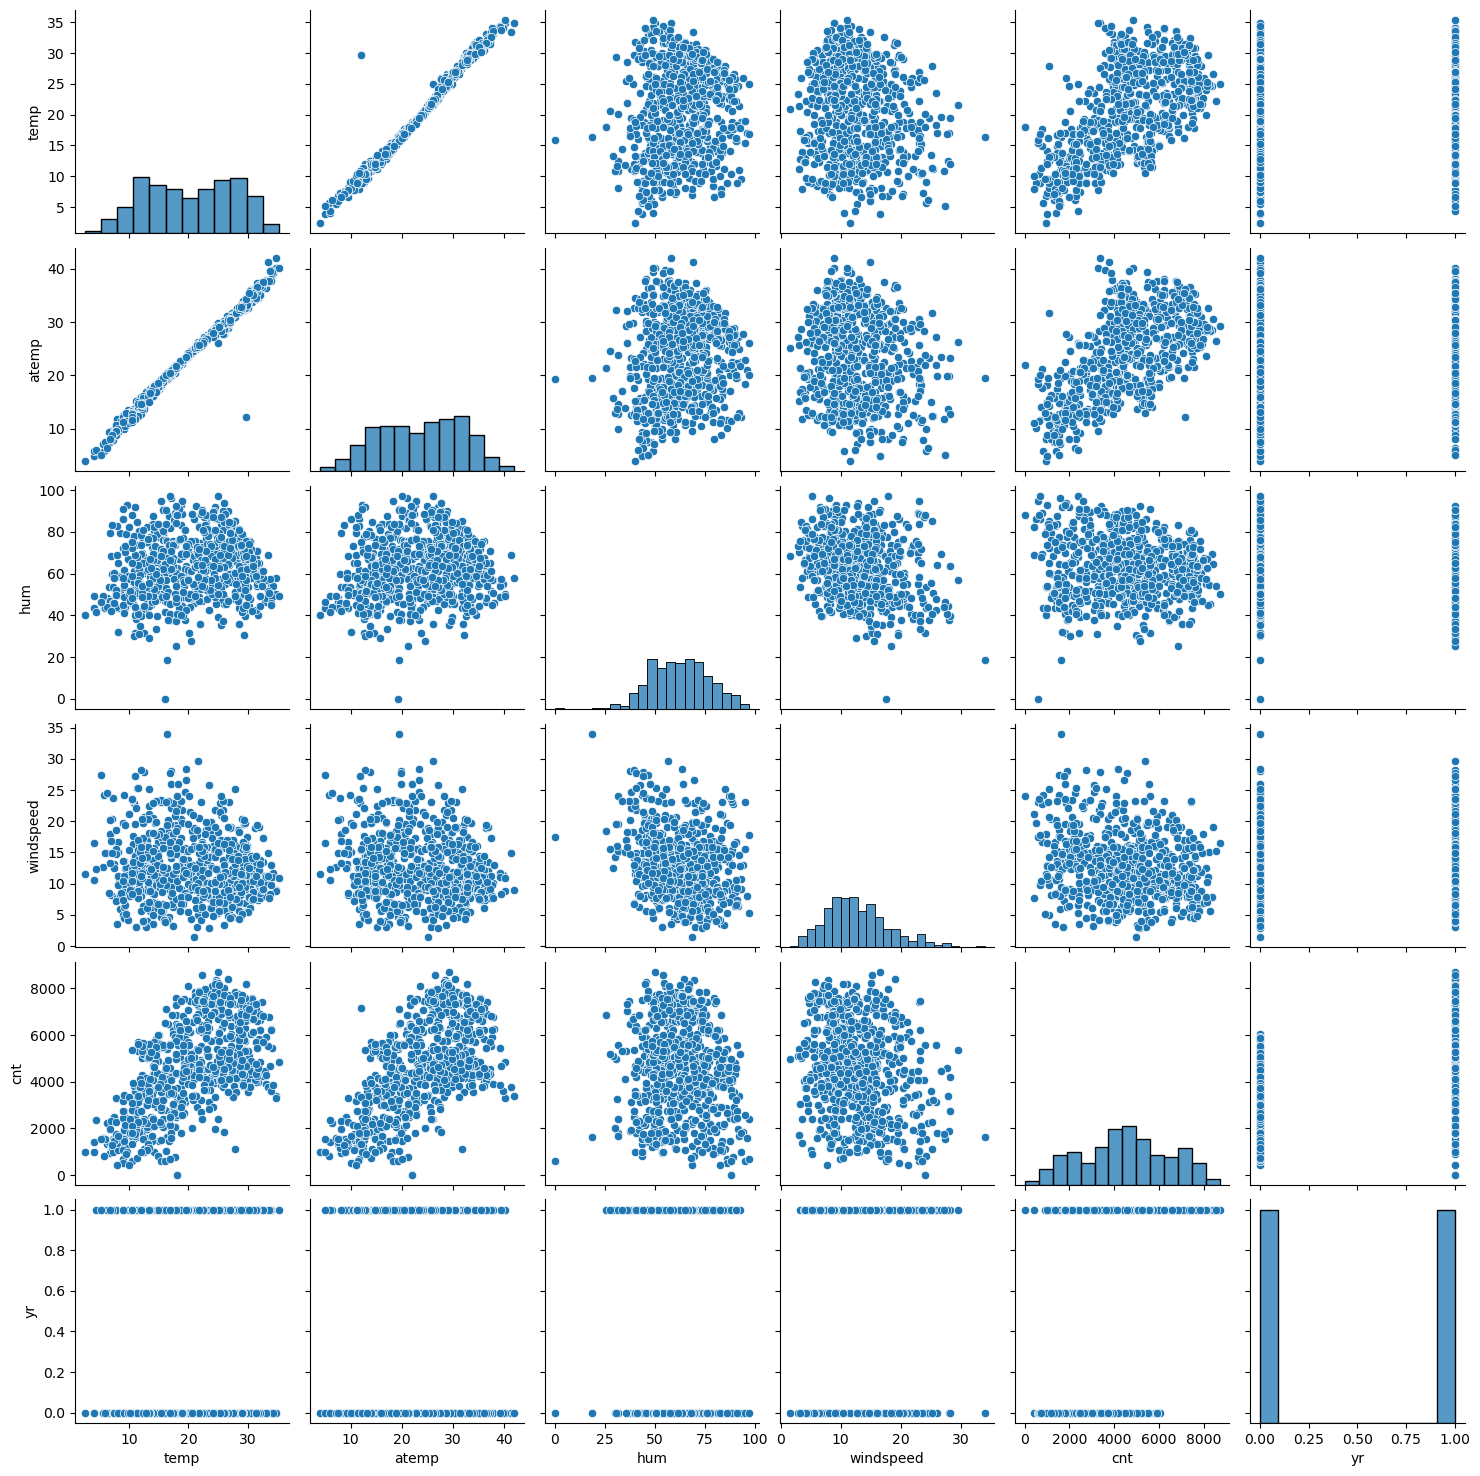

In [9]:
sns.pairplot(bikes[cont_vars])
plt.show()

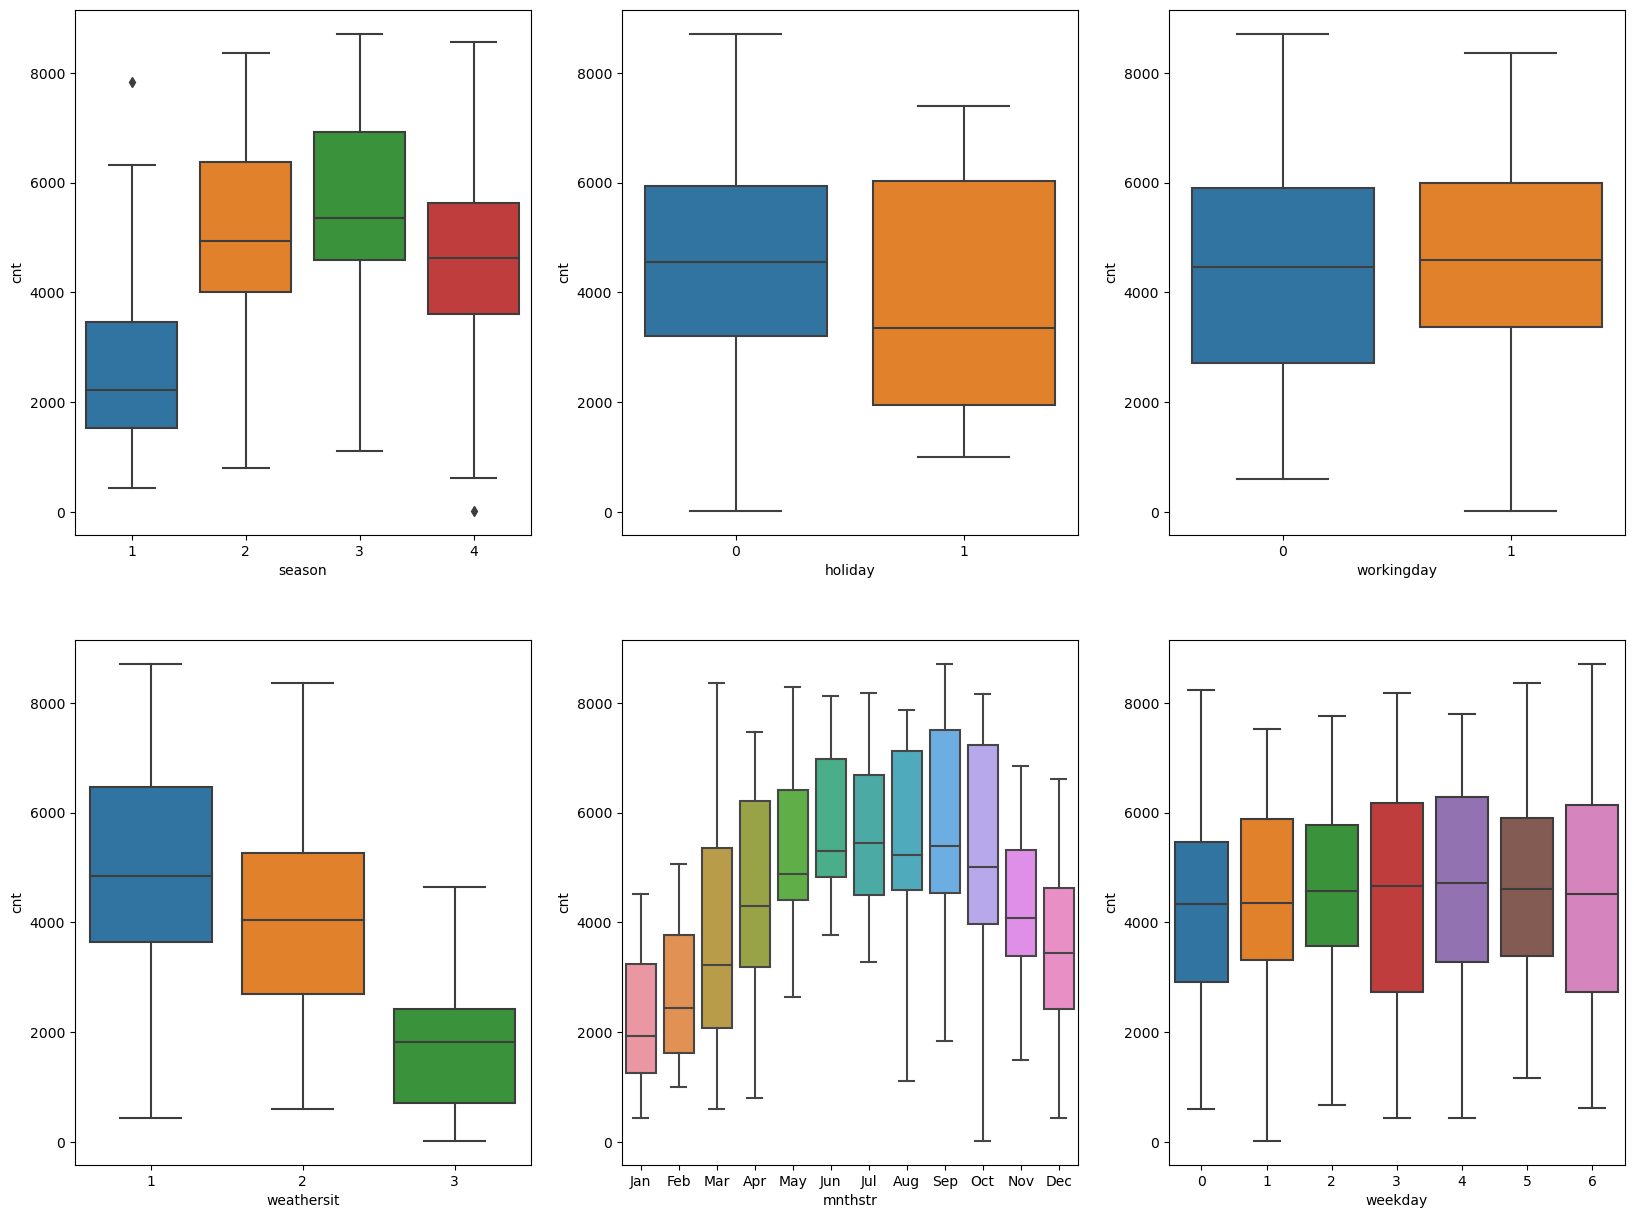

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bikes)

plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='cnt', data=bikes)

plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data=bikes)

plt.subplot(2,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bikes)

plt.subplot(2,3,5)
sns.boxplot(x='mnthstr', y='cnt', data=bikes)

plt.subplot(2,3,6)
sns.boxplot(x='weekday', y='cnt', data=bikes)

plt.show()

### Interpretations
- It is very evident from above plots that weekday has constant median demand and thus is insignificant and can be dropped
- Nothing much is changing for working day so can be dropped but keeping it to check its significance
- Holidays can be analyzed further so keeping it but seems like negatively correlated
- Rest all categorical variables showing variations with changing values

In [11]:
bikes = bikes.drop(['dteday','weekday'], axis = 1)
bikes.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnthstr
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan


In [12]:
bikes['weathersit'] = bikes['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})
bikes.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnthstr
0,1,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan
1,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan
2,1,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan
3,1,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan
4,1,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan


In [13]:
weather = pd.get_dummies(bikes['weathersit'], dtype=int)
weather

,Clear,Light,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


### Since there is no data for heavy weather, not dropping the first column since we need to predict for heavy weather as well

In [14]:
bikes = pd.concat([bikes,weather], axis=1)
bikes.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnthstr,Clear,Light,Mist
0,1,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan,0,0,1
1,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan,0,0,1
2,1,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan,1,0,0
3,1,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan,1,0,0
4,1,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan,1,0,0


In [15]:
bikes = bikes.drop('weathersit', axis = 1)
bikes.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mnthstr,Clear,Light,Mist
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan,0,0,1
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan,0,0,1
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan,1,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan,1,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan,1,0,0


In [16]:
months = pd.get_dummies(bikes['mnthstr'], dtype=int, drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
bikes = pd.concat([bikes,months], axis=1)
bikes.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [18]:
bikes = bikes.drop('mnthstr', axis = 1)
bikes.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [19]:
bikes['season'] = bikes['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bikes.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [20]:
season = pd.get_dummies(bikes['season'], dtype=int, drop_first=True)
season

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


#### seasons dummies
- 100 Spring
- 010 Summer
- 001 Winter
- 000 Fall

In [21]:
bikes = pd.concat([bikes,season], axis=1)
bikes.head()

,season,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
0,Spring,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,1,0,0
1,Spring,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,1,0,0
2,Spring,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bikes = bikes.drop(['season'], axis = 1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


### Shall we drop casual and registered as well since this is related to target var?

In [23]:
bikes = bikes.drop(['casual','registered'], axis = 1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 25)
(220, 25)


In [25]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

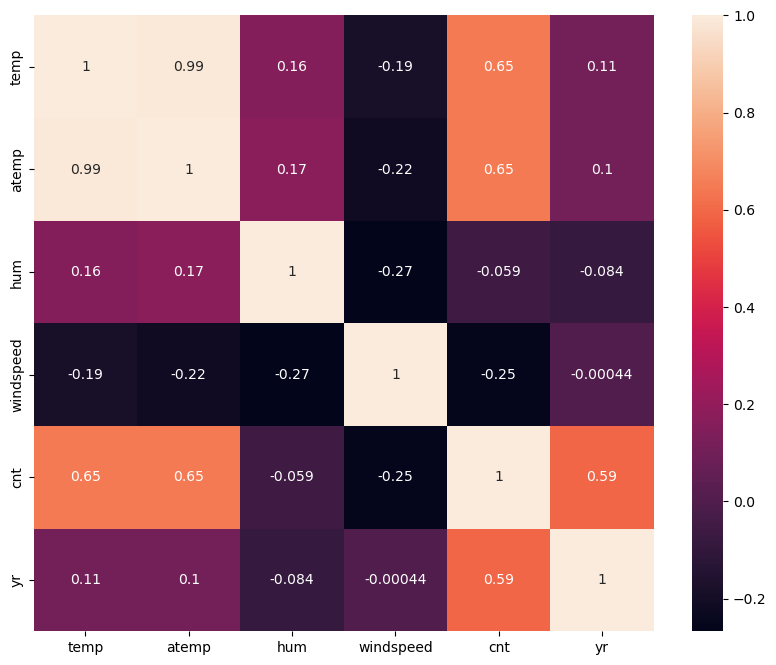

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train[cont_vars].corr(), annot=True)

### Looking at above heatmap, it is evident that temp and atemp are highly correlated and thus atemp shouldn't be considered since temp is more business related term

In [27]:
df_train = df_train.drop(['atemp'], axis=1)

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
X_train_sm = sm.add_constant(X_train[['holiday','workingday']])

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.685
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0258
Time:                        00:20:31   Log-Likelihood:                 42.580
No. Observations:                 510   AIC:                            -79.16
Df Residuals:                     507   BIC:                            -66.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4925      0.018     27.198      0.000       0.457       0.528
holiday       -0.1120      0.065     -1.736      0.083      -0.239       0.015
workingday     0.0353      0.022      1.623      0.105      -0.007       0.078
==============================================================================
Omnibus:                       46.056   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.833
Skew:                          -0.040   Prob(JB):                     0.000601
Kurtosis:                       2.168   Cond. No.                         8.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since both holiday and working day variable is not changing demand with change in variable as evident from box plot, these can be dropped. The same is evident from very low R-squared value and high P values. Thus, these vars should be dropped

In [30]:
X_train = X_train.drop(['holiday','workingday'], axis=1)

In [31]:
X_train_sm = sm.add_constant(X_train['temp'])

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.46e-61
Time:                        00:20:31   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train_sm = sm.add_constant(X_train[['temp','hum']])

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           5.99e-65
Time:                        00:20:31   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
hum           -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_train_sm = sm.add_constant(X_train[['temp','hum','windspeed']])

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.87e-70
Time:                        00:20:31   Log-Likelihood:                 202.83
No. Observations:                 510   AIC:                            -397.7
Df Residuals:                     506   BIC:                            -380.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4596      0.043     10.580      0.000       0.374       0.545
temp           0.6381      0.033     19.447      0.000       0.574       0.703
hum           -0.3214      0.052     -6.205      0.000      -0.423      -0.220
windspeed     -0.2492      0.045     -5.571      0.000      -0.337      -0.161
==============================================================================
Omnibus:                        4.176   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.501
Skew:                           0.110   Prob(JB):                        0.174
Kurtosis:                       2.659   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Nothing much changed after adding hum and windspeed, Should be dropped after VIF

In [34]:
X_train_lm = sm.add_constant(X_train[['temp','hum','windspeed','Spring','Summer','Winter']])

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     98.13
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.11e-81
Time:                        00:20:32   Log-Likelihood:                 236.52
No. Observations:                 510   AIC:                            -459.0
Df Residuals:                     503   BIC:                            -429.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4514      0.056      8.085      0.000       0.342       0.561
temp           0.6620      0.055     12.142      0.000       0.555       0.769
hum           -0.3996      0.050     -8.043      0.000      -0.497      -0.302
windspeed     -0.2430      0.043     -5.697      0.000      -0.327      -0.159
Spring        -0.0207      0.033     -0.620      0.535      -0.086       0.045
Summer         0.0727      0.023      3.231      0.001       0.029       0.117
Winter         0.1266      0.027      4.621      0.000       0.073       0.180
==============================================================================
Omnibus:                        3.252   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.554
Skew:                           0.015   Prob(JB):                        0.279
Kurtosis:                       2.655   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### adding seasons improved the rsquared

In [35]:
X_train_lm = sm.add_constant(X_train[['temp','hum','windspeed','Spring','Summer','Winter','yr']])

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     280.5
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          5.61e-169
Time:                        00:20:32   Log-Likelihood:                 444.74
No. Observations:                 510   AIC:                            -873.5
Df Residuals:                     502   BIC:                            -839.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3576      0.037      9.576      0.000       0.284       0.431
temp           0.5464      0.037     14.942      0.000       0.475       0.618
hum           -0.3106      0.033     -9.339      0.000      -0.376      -0.245
windspeed     -0.2354      0.028     -8.294      0.000      -0.291      -0.180
Spring        -0.0586      0.022     -2.625      0.009      -0.102      -0.015
Summer         0.0534      0.015      3.558      0.000       0.024       0.083
Winter         0.0962      0.018      5.264      0.000       0.060       0.132
yr             0.2305      0.009     25.177      0.000       0.213       0.249
==============================================================================
Omnibus:                       87.603   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.039
Skew:                          -0.864   Prob(JB):                     3.70e-49
Kurtosis:                       5.741   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding year further improved the R-squared

### Checking all the columns

In [36]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        0.172871
yr           0.231752
temp         0.444874
hum         -0.167272
windspeed   -0.188024
Clear        0.156098
Light       -0.085815
Mist         0.102588
Aug          0.027424
Dec         -0.044481
Feb         -0.035870
Jan         -0.062629
Jul         -0.030985
Jun          0.008540
Mar          0.007100
May          0.028929
Nov         -0.050446
Oct          0.000907
Sep          0.087134
Spring      -0.045692
Summer       0.043182
Winter       0.112496
dtype: float64

In [37]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.58e-182
Time:                        00:20:32   Log-Likelihood:                 510.86
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     489   BIC:                            -890.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.035      4.910      0.0

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear,75.88
6,Mist,47.17
18,Spring,10.69
20,Winter,9.37
19,Summer,8.24
1,temp,7.01
15,Nov,6.67
16,Oct,6.44
7,Aug,6.33
10,Jan,5.87


### dropping Oct and rechking the impact on other vars VIF

In [40]:
X_train = X_train.drop('Oct', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear,67.12
6,Mist,42.54
17,Spring,10.69
19,Winter,7.14
1,temp,7.00
18,Summer,6.79
5,Light,4.90
7,Aug,4.82
11,Jul,4.37
10,Jan,4.35


In [41]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          5.52e-183
Time:                        00:20:32   Log-Likelihood:                 510.86
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     490   BIC:                            -897.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1732      0.033      5.202      0.0

### The next high P-value is Mar and VIF for Mar is also High so dropping it

In [42]:
X_train = X_train.drop('Mar', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear,63.45
6,Mist,40.48
16,Spring,9.21
18,Winter,7.08
1,temp,6.79
17,Summer,6.78
7,Aug,4.76
5,Light,4.73
11,Jul,4.34
15,Sep,2.94


In [43]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.72e-184
Time:                        00:20:32   Log-Likelihood:                 510.81
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     491   BIC:                            -903.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1755      0.032      5.407      0.0

### p value for Jun is very high, so dropping it

In [44]:
X_train = X_train.drop('Jun', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear,63.29
6,Mist,40.33
15,Spring,8.52
16,Summer,6.58
17,Winter,6.24
1,temp,4.90
5,Light,4.72
7,Aug,3.16
11,Jul,2.79
10,Jan,2.37


In [45]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.91e-185
Time:                        00:20:32   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     492   BIC:                            -909.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.032      5.437      0.0

####  Now the VIF is high for Clear and Mist, so dropping the Clear

In [46]:
X_train = X_train.drop('Clear', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,33.22
1,temp,21.14
14,Spring,7.11
16,Winter,5.81
15,Summer,5.66
3,windspeed,4.90
6,Aug,3.09
10,Jul,2.76
9,Jan,2.40
5,Mist,2.33


In [47]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.91e-185
Time:                        00:20:32   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     492   BIC:                            -909.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3330      0.040      8.262      0.000       0.254       0.412
yr             0.2316      0.008     28.323      0.000       0.216       0.248
temp           0.4498      0.039     11.444      0.000       0.373       0.527
hum           -0.1686      0.038     -4.380      0.000      -0.244      -0.093
windspeed     -0.1894      0.026     -7.265      0.000      -0.241      -0.138
Light         -0.2418      0.027     -9.053      0.000      -0.294      -0.189
Mist          -0.0533      0.011     -5.054      0.000      -0.074      -0.033
Aug            0.0207      0.024      0.856      0.392      -0.027       0.068
Dec           -0.0472      0.019     -2.535      0.012      -0.084      -0.011
Feb           -0.0412      0.022     -1.883      0.060      -0.084       0.002
Jan           -0.0677      0.022     -3.113      0.002      -0.110      -0.025
Jul           -0.0380      0.025     -1.509      0.132      -0.088       0.011
May            0.0243      0.018      1.373      0.170      -0.010       0.059
Nov           -0.0521      0.019     -2.720      0.007      -0.090      -0.014
Sep            0.0816      0.022      3.721      0.000       0.039       0.125
Spring        -0.0445      0.027     -1.630      0.104      -0.098       0.009
Summer         0.0419      0.024      1.756      0.080      -0.005       0.089
Winter         0.1095      0.023      4.717      0.000       0.064       0.155
==============================================================================
Omnibus:                       83.935   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.896
Skew:                          -0.800   Prob(JB):                     2.67e-51
Kurtosis:                       5.898   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### dropping Aug due tohigh p value

In [48]:
X_train = X_train.drop('Aug', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,31.55
1,temp,18.37
13,Spring,5.45
3,windspeed,4.83
15,Winter,4.07
14,Summer,3.34
8,Jan,2.37
5,Mist,2.32
0,yr,2.10
7,Feb,1.91


In [49]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.31e-186
Time:                        00:20:32   Log-Likelihood:                 510.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     493   BIC:                            -914.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3447      0.038      9.092      0.000       0.270       0.419
yr             0.2318      0.008     28.366      0.000       0.216       0.248
temp           0.4522      0.039     11.539      0.000       0.375       0.529
hum           -0.1672      0.038     -4.349      0.000      -0.243      -0.092
windspeed     -0.1896      0.026     -7.276      0.000      -0.241      -0.138
Light         -0.2429      0.027     -9.105      0.000      -0.295      -0.190
Mist          -0.0529      0.011     -5.025      0.000      -0.074      -0.032
Dec           -0.0482      0.019     -2.596      0.010      -0.085      -0.012
Feb           -0.0413      0.022     -1.886      0.060      -0.084       0.002
Jan           -0.0677      0.022     -3.115      0.002      -0.110      -0.025
Jul           -0.0527      0.018     -2.866      0.004      -0.089      -0.017
May            0.0239      0.018      1.347      0.178      -0.011       0.059
Nov           -0.0535      0.019     -2.803      0.005      -0.091      -0.016
Sep            0.0698      0.017      4.099      0.000       0.036       0.103
Spring        -0.0577      0.022     -2.570      0.010      -0.102      -0.014
Summer         0.0279      0.017      1.607      0.109      -0.006       0.062
Winter         0.0973      0.018      5.323      0.000       0.061       0.133
==============================================================================
Omnibus:                       84.901   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.877
Skew:                          -0.810   Prob(JB):                     9.93e-52
Kurtosis:                       5.903   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since Dec-Feb is associated with Winter, dropping the same

In [50]:
X_train = X_train.drop(['Dec', 'Jan', 'Feb'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.12
1,temp,16.17
3,windspeed,4.80
10,Spring,4.03
12,Winter,3.75
11,Summer,3.31
5,Mist,2.28
0,yr,2.09
6,Jul,1.59
7,May,1.58


In [51]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.27e-187
Time:                        00:20:32   Log-Likelihood:                 504.19
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2994      0.036      8.337      0.000       0.229       0.370
yr             0.2302      0.008     27.969      0.000       0.214       0.246
temp           0.5164      0.035     14.809      0.000       0.448       0.585
hum           -0.1811      0.039     -4.698      0.000      -0.257      -0.105
windspeed     -0.1801      0.026     -6.895      0.000      -0.231      -0.129
Light         -0.2325      0.027     -8.704      0.000      -0.285      -0.180
Mist          -0.0510      0.011     -4.810      0.000      -0.072      -0.030
Jul           -0.0563      0.019     -3.039      0.003      -0.093      -0.020
May            0.0196      0.018      1.101      0.271      -0.015       0.055
Nov           -0.0310      0.017     -1.777      0.076      -0.065       0.003
Sep            0.0770      0.017      4.530      0.000       0.044       0.110
Spring        -0.0677      0.022     -3.136      0.002      -0.110      -0.025
Summer         0.0425      0.017      2.509      0.012       0.009       0.076
Winter         0.1004      0.018      5.576      0.000       0.065       0.136
==============================================================================
Omnibus:                       70.722   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.832
Skew:                          -0.699   Prob(JB):                     1.99e-40
Kurtosis:                       5.579   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### dropping may High p value

In [52]:
X_train = X_train.drop(['May'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.10
1,temp,16.12
3,windspeed,4.71
9,Spring,4.02
11,Winter,3.75
10,Summer,2.80
5,Mist,2.28
0,yr,2.08
6,Jul,1.58
7,Nov,1.58


In [53]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          7.66e-188
Time:                        00:20:32   Log-Likelihood:                 503.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     497   BIC:                            -926.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2916      0.035      8.280      0.000       0.222       0.361
yr             0.2298      0.008     27.943      0.000       0.214       0.246
temp           0.5226      0.034     15.188      0.000       0.455       0.590
hum           -0.1755      0.038     -4.591      0.000      -0.251      -0.100
windspeed     -0.1818      0.026     -6.970      0.000      -0.233      -0.131
Light         -0.2342      0.027     -8.785      0.000      -0.287      -0.182
Mist          -0.0512      0.011     -4.828      0.000      -0.072      -0.030
Jul           -0.0567      0.019     -3.056      0.002      -0.093      -0.020
Nov           -0.0302      0.017     -1.730      0.084      -0.064       0.004
Sep            0.0768      0.017      4.518      0.000       0.043       0.110
Spring        -0.0641      0.021     -3.006      0.003      -0.106      -0.022
Summer         0.0506      0.015      3.317      0.001       0.021       0.081
Winter         0.1021      0.018      5.692      0.000       0.067       0.137
==============================================================================
Omnibus:                       69.570   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.920
Skew:                          -0.702   Prob(JB):                     4.66e-38
Kurtosis:                       5.473   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### dropping Nov due to high p value

In [54]:
X_train = X_train.drop(['Nov'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.02
1,temp,16.03
3,windspeed,4.65
8,Spring,4.00
10,Winter,3.32
9,Summer,2.79
5,Mist,2.28
0,yr,2.08
6,Jul,1.58
7,Sep,1.38


In [55]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.16e-188
Time:                        00:20:32   Log-Likelihood:                 502.04
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     498   BIC:                            -929.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.035      8.102      0.000       0.214       0.352
yr             0.2297      0.008     27.882      0.000       0.214       0.246
temp           0.5310      0.034     15.555      0.000       0.464       0.598
hum           -0.1733      0.038     -4.528      0.000      -0.249      -0.098
windspeed     -0.1840      0.026     -7.052      0.000      -0.235      -0.133
Light         -0.2326      0.027     -8.711      0.000      -0.285      -0.180
Mist          -0.0509      0.011     -4.787      0.000      -0.072      -0.030
Jul           -0.0562      0.019     -3.024      0.003      -0.093      -0.020
Sep            0.0798      0.017      4.711      0.000       0.047       0.113
Spring        -0.0587      0.021     -2.775      0.006      -0.100      -0.017
Summer         0.0535      0.015      3.517      0.000       0.024       0.083
Winter         0.0951      0.018      5.431      0.000       0.061       0.130
==============================================================================
Omnibus:                       69.912   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.944
Skew:                          -0.702   Prob(JB):                     1.03e-38
Kurtosis:                       5.503   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### dropping hum due to high VIF

In [56]:
X_train = X_train.drop(['hum'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
8,Summer,2.23
0,yr,2.07
7,Spring,2.07
9,Winter,1.77
5,Jul,1.58
4,Mist,1.55
6,Sep,1.33
3,Light,1.08


In [57]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.00e-185
Time:                        00:20:32   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1974      0.030      6.593      0.000       0.139       0.256
yr             0.2339      0.008     28.037      0.000       0.218       0.250
temp           0.4920      0.034     14.611      0.000       0.426       0.558
windspeed     -0.1496      0.025     -5.880      0.000      -0.200      -0.100
Light         -0.2800      0.025    -11.186      0.000      -0.329      -0.231
Mist          -0.0785      0.009     -8.851      0.000      -0.096      -0.061
Jul           -0.0510      0.019     -2.697      0.007      -0.088      -0.014
Sep            0.0734      0.017      4.263      0.000       0.040       0.107
Spring        -0.0696      0.021     -3.247      0.001      -0.112      -0.027
Summer         0.0469      0.015      3.038      0.003       0.017       0.077
Winter         0.0792      0.017      4.527      0.000       0.045       0.114
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now above model has good VIF and p values in conjunction with R-Squared values, however, we would rely on auto selection using RFE

### Using RFE

In [58]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 25)
(220, 25)


In [59]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Clear', False, 3),
 ('Light', True, 1),
 ('Mist', False, 4),
 ('Aug', False, 11),
 ('Dec', False, 7),
 ('Feb', False, 8),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 10),
 ('Nov', False, 6),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Spring', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Light', 'Jul', 'Sep',
       'Summer', 'Winter'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Clear', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Spring'],
      dtype='object')

In [66]:
X_train_rfe = X_train[col]

In [67]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.79e-186
Time:                        00:20:33   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
3,temp,1.53
7,Jul,1.43
9,Summer,1.33
10,Winter,1.28
4,hum,1.26
8,Sep,1.19
5,windspeed,1.16
6,Light,1.11
1,yr,1.03


In [71]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

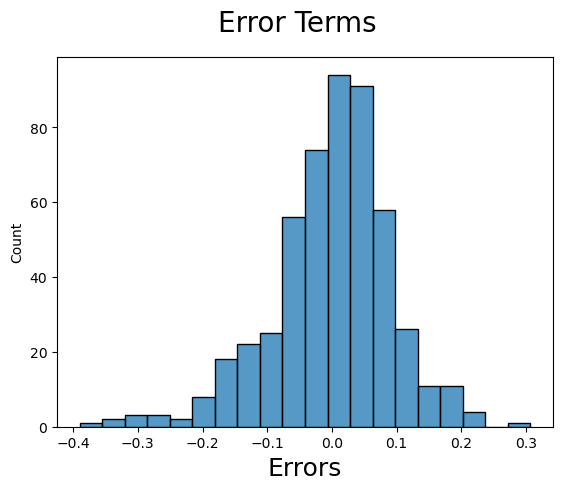

In [73]:
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)  

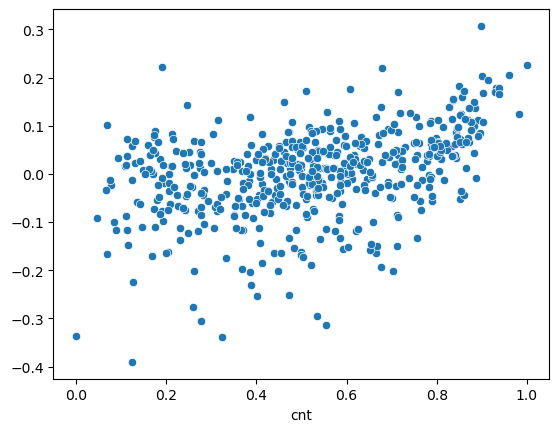

In [87]:
sns.scatterplot(x=y_train,y=(y_train - y_train_cnt))
plt.show()

### There is no visible pattern of error terms

In [74]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [76]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,1,0,0,0,0,0,0,1,0


In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)

X_test_new = X_test[X_train_rfe.columns]

In [81]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Evaluating the model

In [85]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8038201600802428

Text(0, 0.5, 'y_pred')

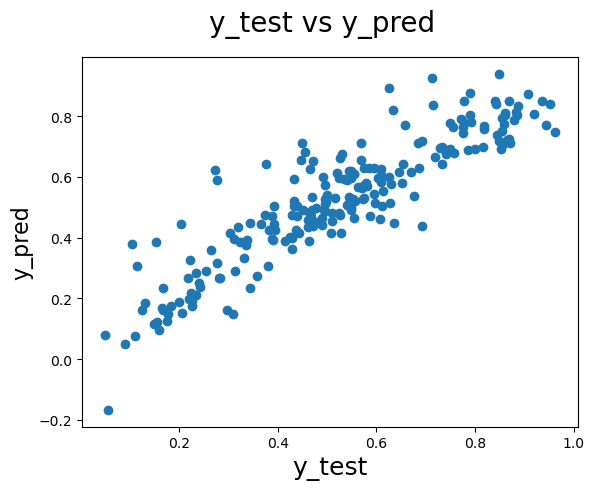

In [82]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label